# Unveiling the Android App Market: Analyzing Google Play Store Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps_df= pd.read_csv('/content/apps.csv')
reviews_df= pd.read_csv('/content/user_reviews.csv')

In [3]:
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps_df.shape

(9659, 14)

In [5]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
apps_df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [7]:
# Remove the 'Unnamed: 0' column from apps_df
apps_df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Convert 'Installs' to numeric by removing commas and plus signs, and converting to int
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [9]:
# Convert 'Price' to numeric by removing the dollar sign and converting to float
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

In [10]:
# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

In [11]:
# Handle missing values in apps_df
apps_df['Rating'].fillna(apps_df['Rating'].mean(), inplace=True)
apps_df['Size'].fillna(apps_df['Size'].mean(), inplace=True)
apps_df['Current Ver'].fillna('Unknown', inplace=True)
apps_df['Android Ver'].fillna('Unknown', inplace=True)

In [12]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [13]:
reviews_df.shape

(17155, 5)

In [14]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17155 entries, 0 to 17154
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     17155 non-null  object 
 1   Translated_Review       10945 non-null  object 
 2   Sentiment               10946 non-null  object 
 3   Sentiment_Polarity      10946 non-null  float64
 4   Sentiment_Subjectivity  10946 non-null  float64
dtypes: float64(2), object(3)
memory usage: 670.2+ KB


In [15]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,10946.000000,10946.000000
mean,0.172173,0.487589
std,0.359112,0.265377
min,-1.000000,0.000000
25%,0.000000,0.340000
50%,0.136364,0.512500
75%,0.400000,0.650000
max,1.000000,1.000000


In [17]:
# Handle missing values in reviews_df
reviews_df['Translated_Review'].fillna('', inplace=True)
reviews_df['Sentiment'].fillna('Neutral', inplace=True)
reviews_df['Sentiment_Polarity'].fillna(0.0, inplace=True)
reviews_df['Sentiment_Subjectivity'].fillna(0.0, inplace=True)

In [18]:
sns.set_style("whitegrid")

<ipython-input-19-8784f5d42cc1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_count.index, x=category_count.values, palette='viridis')


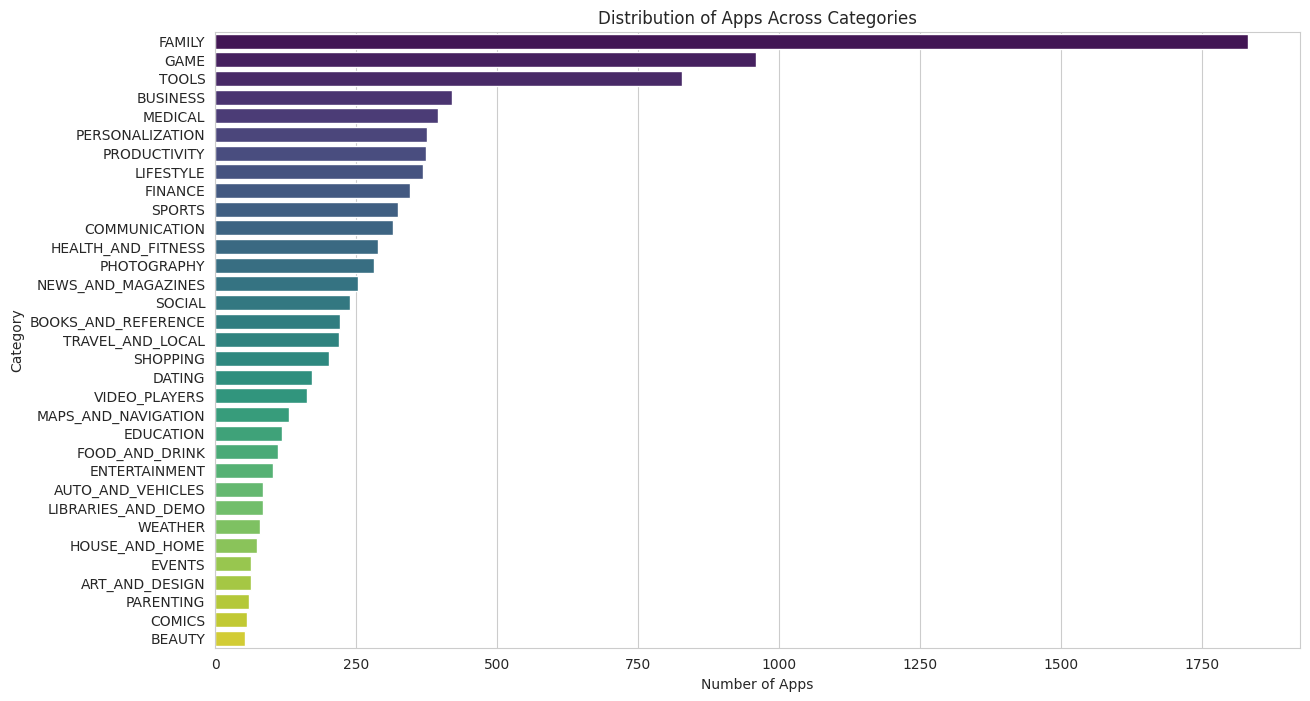

In [19]:
# Category Exploration: Distribution of apps across categories
plt.figure(figsize=(14, 8))
category_count = apps_df['Category'].value_counts()
sns.barplot(y=category_count.index, x=category_count.values, palette='viridis')
plt.title('Distribution of Apps Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

In [20]:
# Metrics Analysis

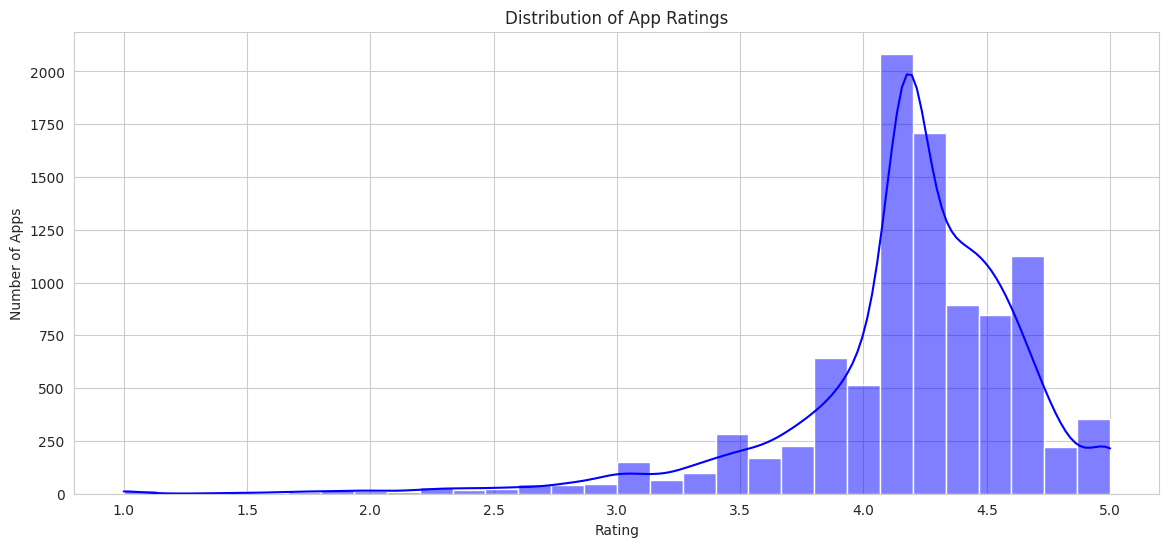

In [21]:
# Distribution of app ratings
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

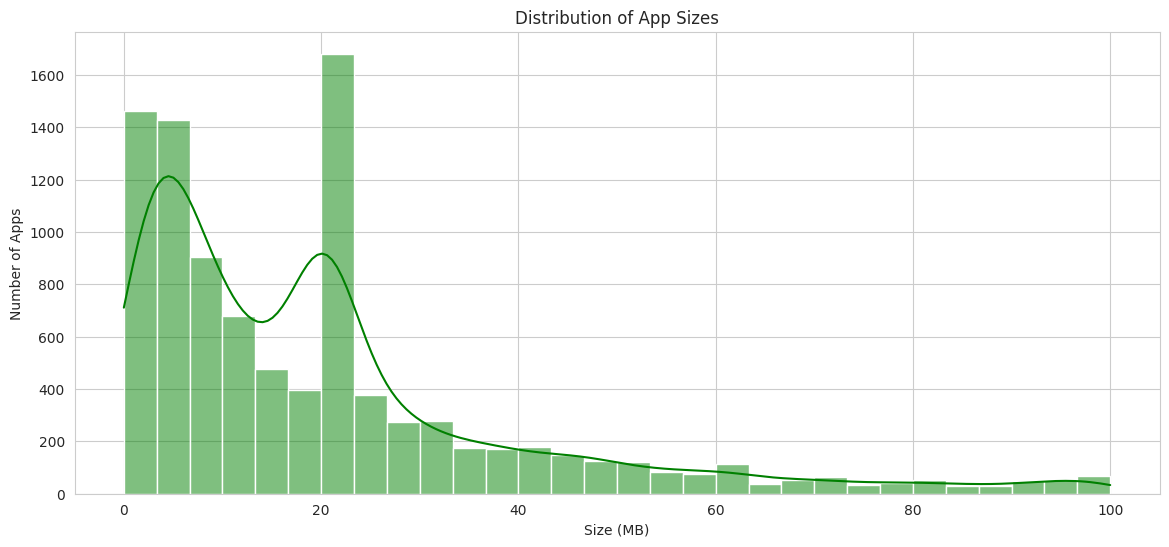

In [22]:
# Distribution of app sizes
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Size'], bins=30, kde=True, color='green')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()

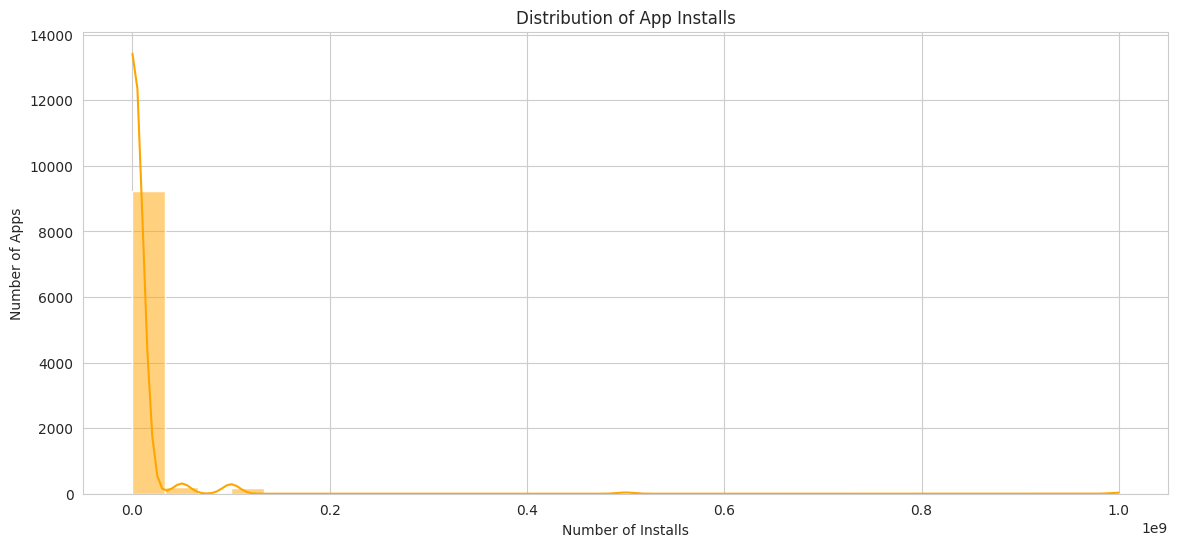

In [23]:
# Distribution of app installs
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Installs'], bins=30, kde=True, color='orange')
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.show()

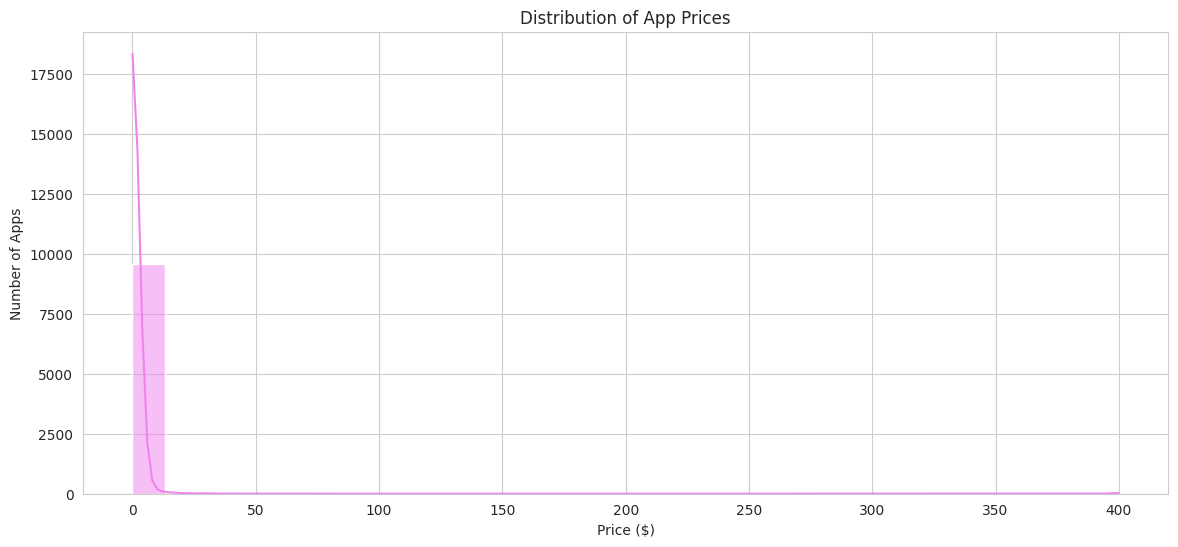

In [24]:
# Distribution of app prices
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Price'], bins=30, kde=True, color='violet')
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.show()

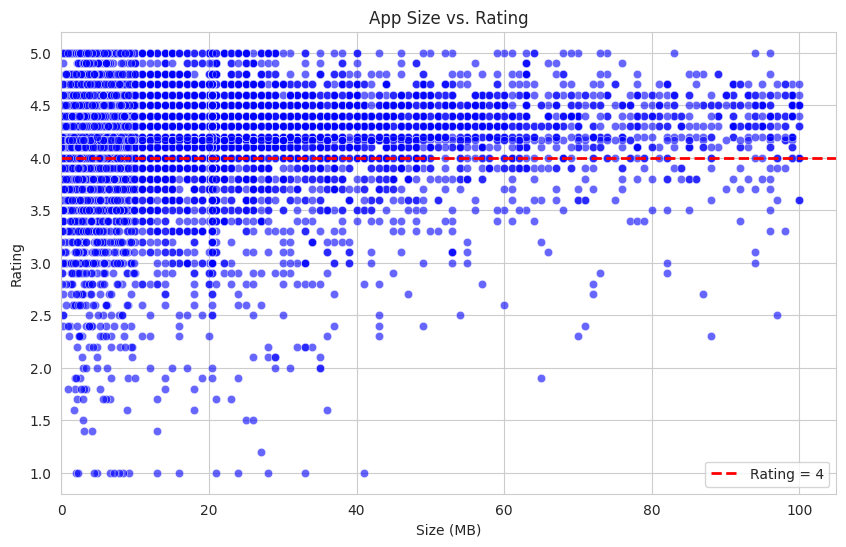

In [35]:
# Scatter plot of App Size vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=apps_df, color='blue', alpha=0.6)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.axhline(y=4, color='red', linestyle='--', linewidth=2, label='Rating = 4')
plt.xlim(left=0)  # Ensure non-negative sizes
plt.legend()
plt.show()

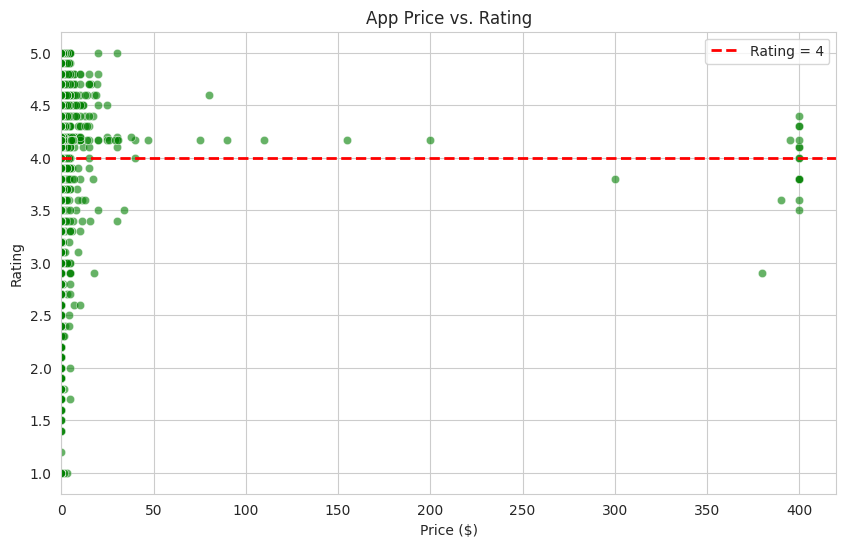

In [36]:
# Scatter plot of App Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=apps_df, color='green', alpha=0.6)
plt.title('App Price vs. Rating')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.axhline(y=4, color='red', linestyle='--', linewidth=2, label='Rating = 4')
plt.xlim(left=0)  # Ensure non-negative prices
plt.legend()
plt.show()

<ipython-input-37-7532157ebf50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price', y='Category', data=apps_df, palette='viridis')


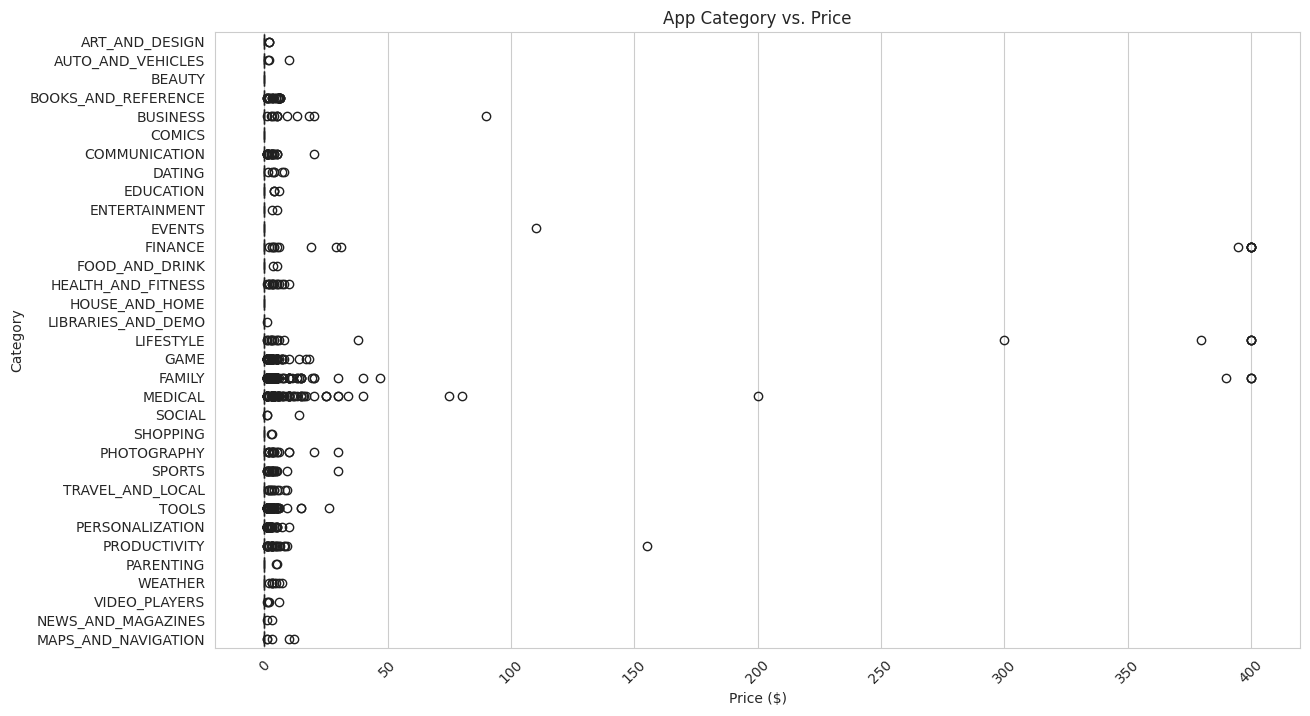

In [37]:
# Box plot of App Category vs. Price
plt.figure(figsize=(14, 8))
sns.boxplot(x='Price', y='Category', data=apps_df, palette='viridis')
plt.title('App Category vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-25-c3873c5731b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories_by_rating.index, x=top_categories_by_rating.values, palette='coolwarm')


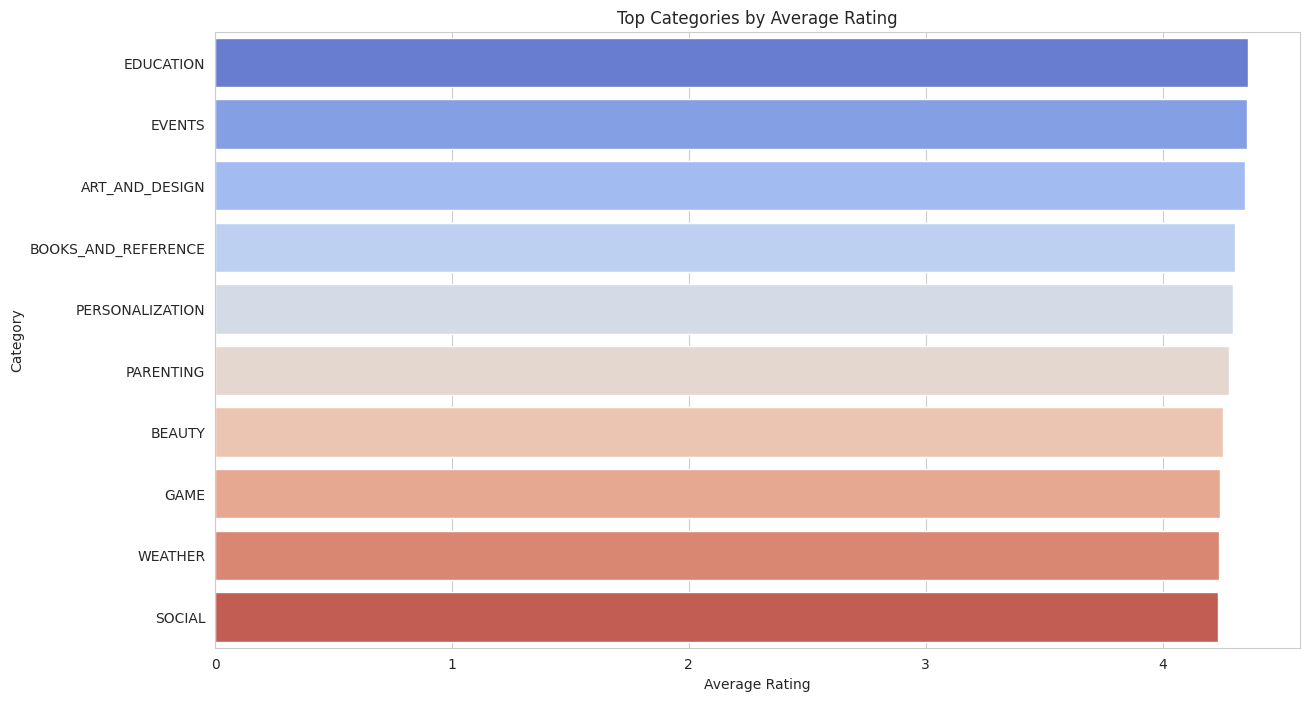

In [25]:
# Top Categories by Average Rating
plt.figure(figsize=(14, 8))
top_categories_by_rating = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=top_categories_by_rating.index, x=top_categories_by_rating.values, palette='coolwarm')
plt.title('Top Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

<ipython-input-26-215b0d231ce1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories_by_installs.index, x=top_categories_by_installs.values, palette='coolwarm')


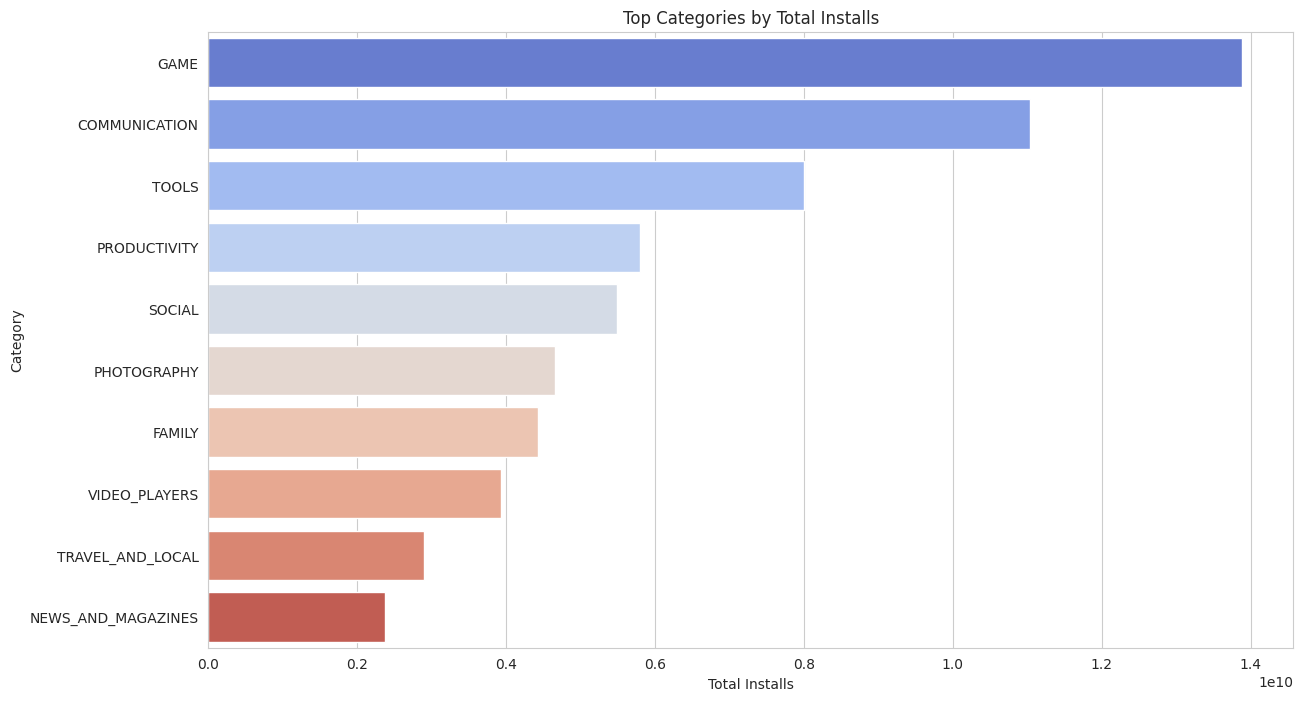

In [26]:
# Top Categories by Total Installs
plt.figure(figsize=(14, 8))
top_categories_by_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_categories_by_installs.index, x=top_categories_by_installs.values, palette='coolwarm')
plt.title('Top Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()

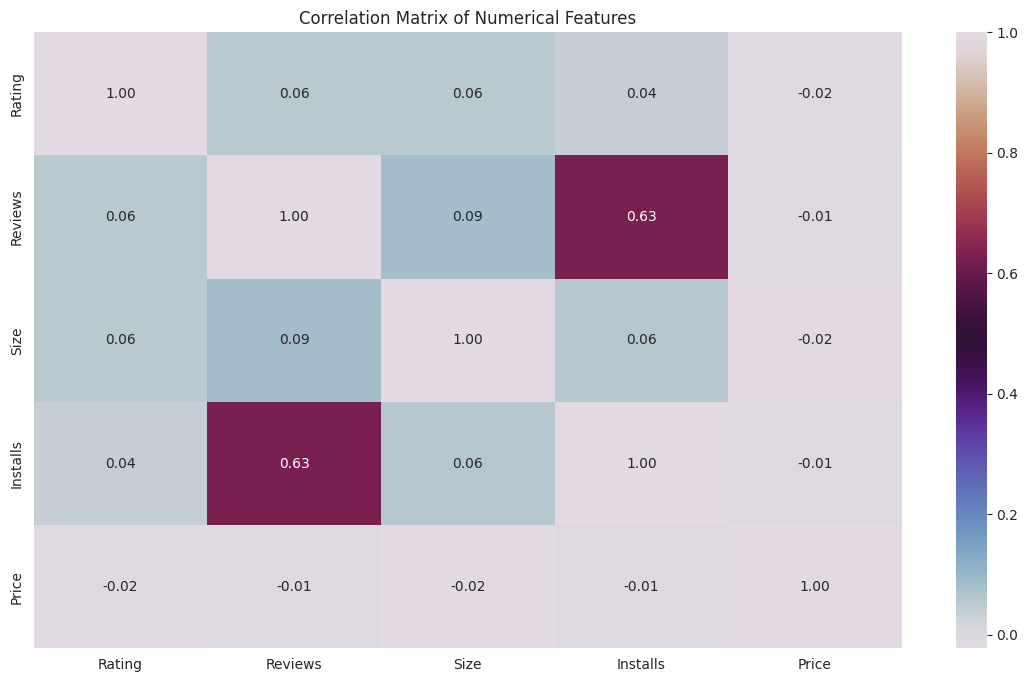

In [32]:
# Correlation Matrix
plt.figure(figsize=(14, 8))
corr_matrix = apps_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='twilight', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [39]:
# Filter out "junk" apps based on specific names or criteria
junk_apps = ['I Am Rich Premium', 'Most Expensive App (H)', 'Junk App 1', 'Junk App 2']  # Add more as needed
filtered_apps_df = apps_df[~apps_df['App'].isin(junk_apps)]

In [40]:
filtered_apps_df = filtered_apps_df[filtered_apps_df['Price'] < 20]

<ipython-input-41-a85f50abcff6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price', y='Category', data=filtered_apps_df, palette='viridis')


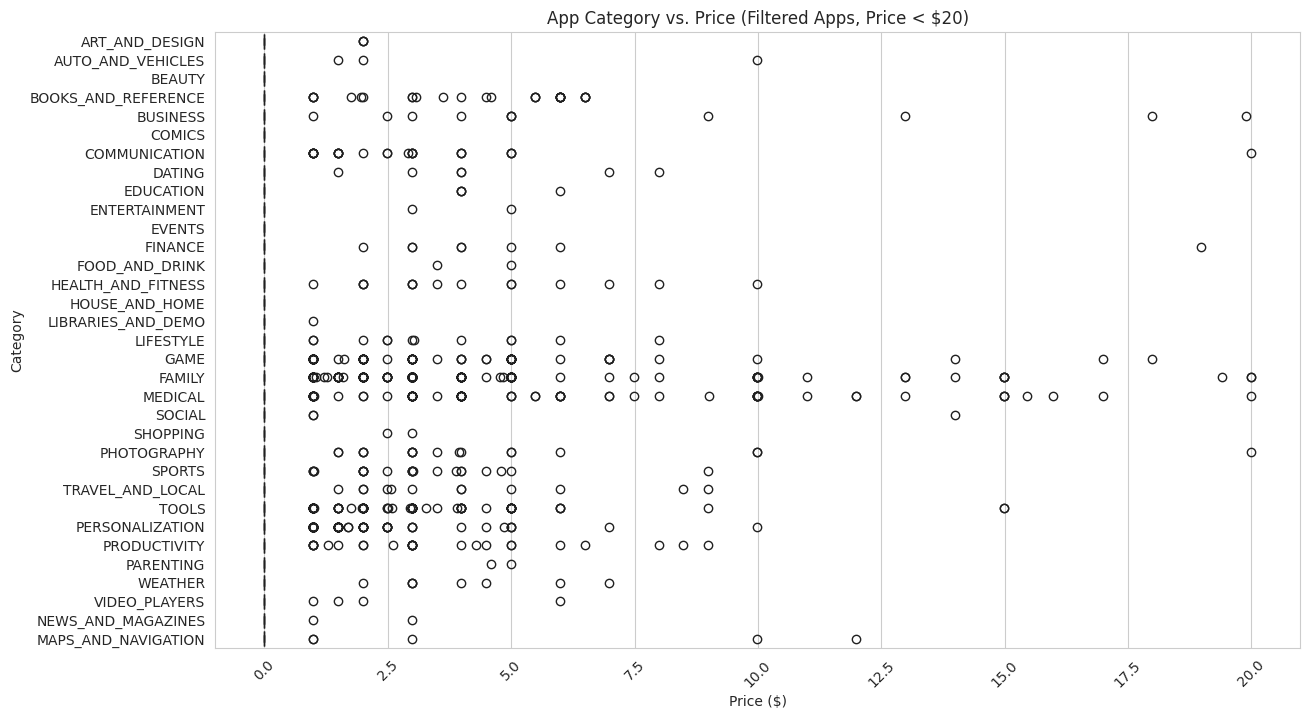

In [41]:
# Box plot of App Category vs. Price for filtered apps
plt.figure(figsize=(14, 8))
sns.boxplot(x='Price', y='Category', data=filtered_apps_df, palette='viridis')
plt.title('App Category vs. Price (Filtered Apps, Price < $20)')
plt.xlabel('Price ($)')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

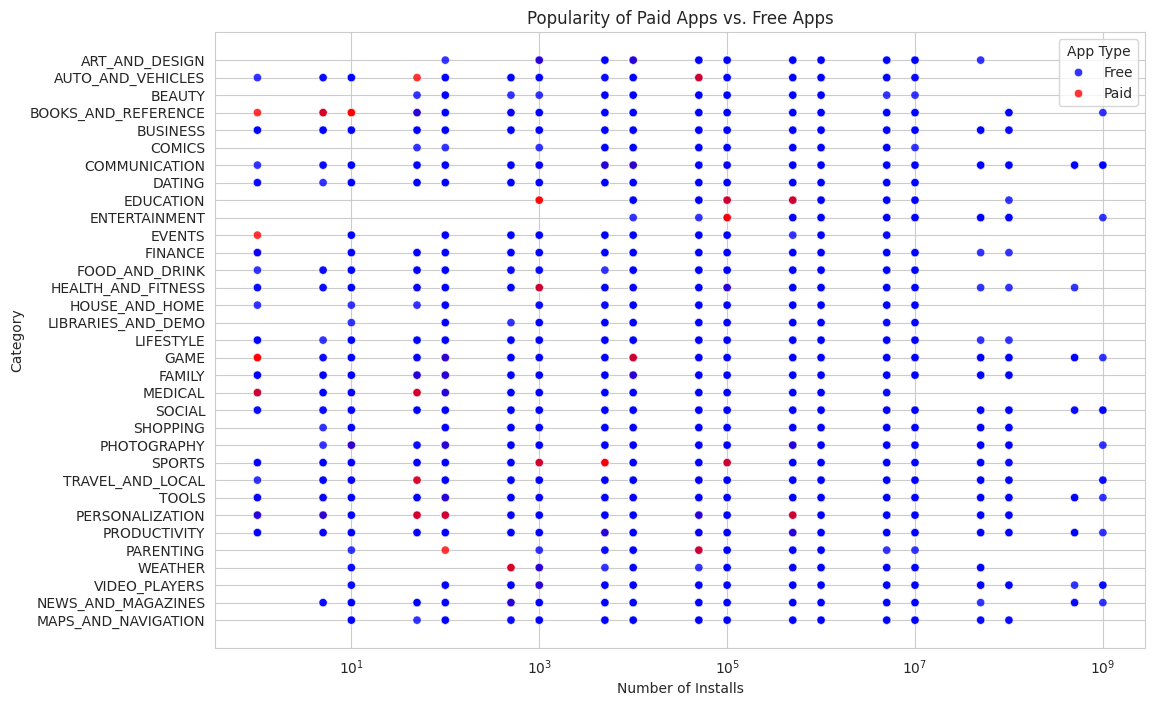

In [42]:
# Scatter plot of Installs vs. Category, differentiated by Paid or Free
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Installs', y='Category', hue='Type', data=apps_df, palette={'Paid': 'red', 'Free': 'blue'}, alpha=0.8)
plt.title('Popularity of Paid Apps vs. Free Apps')
plt.xlabel('Number of Installs')
plt.ylabel('Category')
plt.xscale('log')  # Log scale for better visualization of wide range of installs
plt.legend(title='App Type')
plt.show()

<ipython-input-43-511515c39527>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


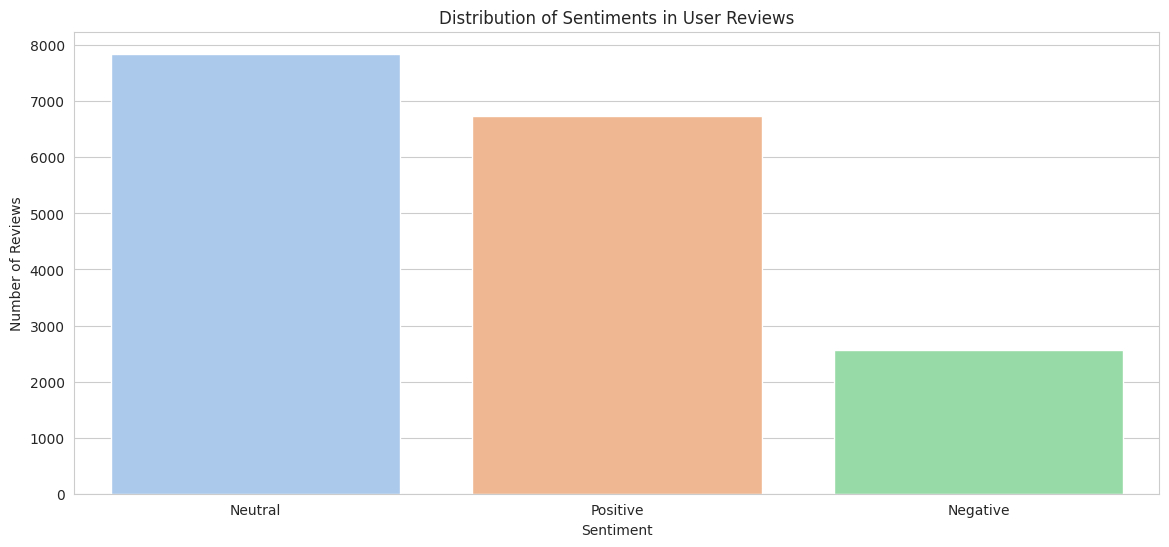

In [43]:
# Sentiment Analysis: Distribution of sentiments in user reviews
plt.figure(figsize=(14, 6))
sentiment_count = reviews_df['Sentiment'].value_counts()
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()